In [3]:
import pydicom as dicom
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import dipy
import nipy
from matplotlib.animation import *
from sklearn.cluster import KMeans, MeanShift
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import pydicom as dicom
from os import listdir, getcwd
from os.path import join
from dipy.segment.mask import median_otsu
%matplotlib notebook

DICOM_ROOT = join(getcwd(), 'dicom')

dicoms = []

for file_name in listdir(DICOM_ROOT)[:5]:
    dicom_file = dicom.read_file(join(DICOM_ROOT, file_name)) 
    brain = dicom_file.pixel_array
    brain, mask = median_otsu(brain, 6, 15)
    dicoms.append(brain)

# fig, ax = plt.subplots()
# img = ax.imshow(dicoms[0], 'gray')

# def animate(i):
#     img.set_data(dicoms[i])

# ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(dicoms), interval=1000)

# from IPython.display import HTML
# HTML(ani.to_jshtml())

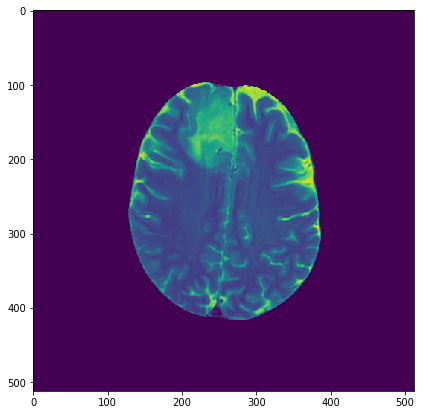

[[0]]


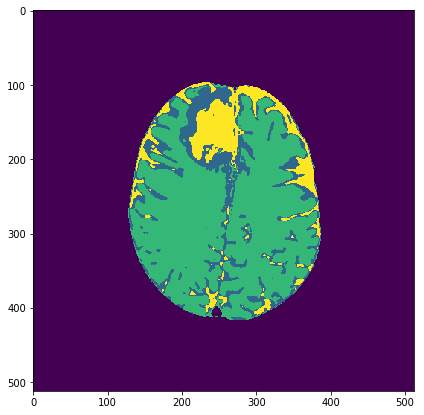

In [10]:
%matplotlib inline
from pylab import rcParams
from scipy import stats
rcParams['figure.figsize'] = 7, 7

from scipy import ndimage

brain = ndimage.median_filter(dicoms[0], 3)
plt.imshow(brain)
plt.show()

# brain = cv.adaptiveThreshold(brain, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
# plt.imshow(brain)
# plt.show()

# brain = cv.normalize(brain, 0, 255, cv.NORM_MINMAX)
brain = brain.reshape((-1, 1))

kmeans = KMeans(n_clusters=4).fit(brain)
print(stats.mode(brain)[0])
clustered = kmeans.labels_.reshape((512, 512))
plt.imshow(clustered)
plt.show()